<a href="https://colab.research.google.com/github/cin181920/Testing-and-Train-Adam-Optimiezer-Epoch-100/blob/main/Testing_Dan_Train_Adam_Optimizer_Epoch_100_Viks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt                                    
import tensorflow as tf                
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
from PIL import Image
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense ,Dropout,Flatten , Conv2D, MaxPooling2D
import os

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
from PIL import Image
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential
from keras.layers import Dense ,Dropout,Flatten , Conv2D, MaxPooling2D
import os

#mengubah image ke array
def read_images(path,num_img):
    array=np.zeros((num_img,224,224,3))
    i=0
    for img in os.listdir(path):
        img_path=path+"/"+img
        img=Image.open(img_path,mode="r")
        data=np.asarray(img,dtype="uint8")
        array[i]=data
        i+=1
    return array

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/Burungku/train2/"
test_dir = "/content/drive/MyDrive/Burungku/test2/"
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen= train_datagen.flow_from_directory(train_dir,
                                             target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 )

test_gen= test_datagen.flow_from_directory(test_dir,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 951 images belonging to 7 classes.
Found 35 images belonging to 7 classes.


In [22]:
print(train_gen.class_indices)

{'Cendrawasih Kuning Besar': 0, 'Jalak Bali': 1, 'Kakak Tua Putih Jambul Kuning': 2, 'Kasuari': 3, 'Lain-lain': 4, 'Maleo': 5, 'Merak Biru': 6}


In [14]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(7,activation="softmax"))

In [15]:
optimizer6=tf.keras.optimizers.Adam(
    learning_rate=0.001    
)

model.compile(optimizer6, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    train_gen,
    validation_data = test_gen,
    epochs = 100,
    verbose=2
)

Epoch 1/100
30/30 - 8s - loss: 1.7684 - accuracy: 0.3091 - val_loss: 1.1295 - val_accuracy: 0.6000 - 8s/epoch - 254ms/step
Epoch 2/100
30/30 - 7s - loss: 1.1961 - accuracy: 0.5258 - val_loss: 0.7519 - val_accuracy: 0.7429 - 7s/epoch - 236ms/step
Epoch 3/100
30/30 - 7s - loss: 1.0175 - accuracy: 0.6183 - val_loss: 0.7436 - val_accuracy: 0.7143 - 7s/epoch - 223ms/step
Epoch 4/100
30/30 - 8s - loss: 0.9116 - accuracy: 0.6551 - val_loss: 0.8512 - val_accuracy: 0.6571 - 8s/epoch - 258ms/step
Epoch 5/100
30/30 - 7s - loss: 0.8632 - accuracy: 0.6656 - val_loss: 0.7118 - val_accuracy: 0.6571 - 7s/epoch - 222ms/step
Epoch 6/100
30/30 - 7s - loss: 0.7720 - accuracy: 0.7256 - val_loss: 0.6392 - val_accuracy: 0.8000 - 7s/epoch - 224ms/step
Epoch 7/100
30/30 - 7s - loss: 0.6973 - accuracy: 0.7234 - val_loss: 0.4553 - val_accuracy: 0.8286 - 7s/epoch - 222ms/step
Epoch 8/100
30/30 - 7s - loss: 0.6117 - accuracy: 0.7886 - val_loss: 0.5177 - val_accuracy: 0.8286 - 7s/epoch - 222ms/step
Epoch 9/100
30/3

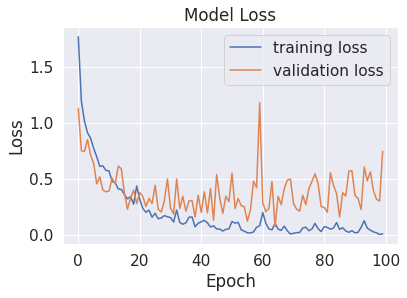

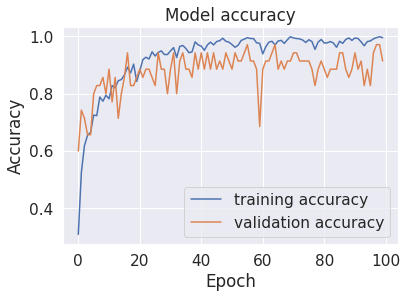

In [16]:
# Make a pandas dataframe so plots can be made from the model
history_frame = pd.DataFrame(history.history)

# Loss curve
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

# Accuracy curve
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

In [57]:
# metrics of the selected model
history_frame[history_frame.val_loss == history_frame.val_loss.min()]

,loss,accuracy,val_loss,val_accuracy
64,0.103869,0.970557,0.074854,0.971429


# Testing Menggunakan Precision

In [109]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
                      test_dir, # Put your path here
                      target_size=(150, 150),
                      batch_size=32,
                      shuffle=False)

# test_data_generator = test_generator.flow_from_directory(
#                       train_dir, # Put your path here
#                       target_size=(150, 150),
#                       batch_size=32,
#                       shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 35 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  app.launch_new_instance()


In [110]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  

In [111]:
print(true_classes)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6]


In [112]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

                               precision    recall  f1-score   support

     Cendrawasih Kuning Besar       1.00      0.80      0.89         5
                   Jalak Bali       1.00      1.00      1.00         5
Kakak Tua Putih Jambul Kuning       0.71      1.00      0.83         5
                      Kasuari       0.67      0.40      0.50         5
                    Lain-lain       0.57      0.80      0.67         5
                        Maleo       1.00      0.20      0.33         5
                   Merak Biru       0.62      1.00      0.77         5

                     accuracy                           0.74        35
                    macro avg       0.80      0.74      0.71        35
                 weighted avg       0.80      0.74      0.71        35



In [113]:
cm = metrics.confusion_matrix(true_classes, predicted_classes)
print(cm)

[[4 0 0 0 1 0 0]
 [0 5 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 2 0 0 3]
 [0 0 1 0 4 0 0]
 [0 0 1 1 2 1 0]
 [0 0 0 0 0 0 5]]


In [114]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=100)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

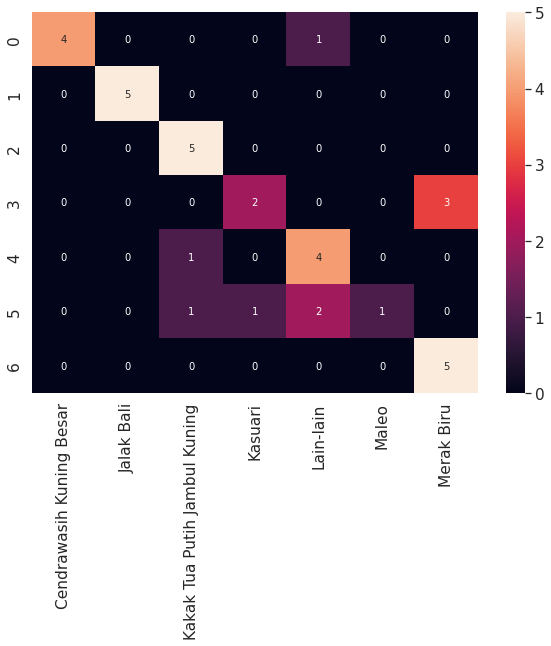

In [115]:
from sklearn import metrics
import itertools

# score = metrics.accuracy_score(true_classes,predicted_classes)
# print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(true_classes,predicted_classes)
# plot_confusion_matrix(cm, classes= class_labels)


import seaborn as sns
import pandas as pd

Data_frame= pd.DataFrame(cm, columns=class_labels)
plt.figure(figsize = (10,7))
sns.heatmap(Data_frame, annot=True)

In [116]:
test_loss = model.evaluate(train_gen)
print(f'Test loss : {str(test_loss[1])}')
print(f'Test Accuracy : {test_loss[1] * 100:.2f}%')

30/30 [==============================] - 7s 216ms/step - loss: 0.0184 - accuracy: 0.9937
Test loss : 0.9936908483505249
Test Accuracy : 99.37%


In [117]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt                                    
import tensorflow as tf                
from tqdm import tqdm
#model.save("/content/drive/MyDrive/Burungku/adamtesting100.h5")
loaded_model2 = load_model('/content/drive/MyDrive/Burungku/adamtesting100.h5')
class_names = ['Cendrawasih Kuning Besar', 'Jalak Bali', 'Kakak Tua Putih Jambul Kuning', 'Kasuari', 'Lain-lain', 'Maleo', 'Merak Biru']

In [118]:
def output(location):
    img = load_img(location, target_size = (150, 150, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = loaded_model2.predict(img)
    y_class = answer.argmax(axis = -1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = class_names[y]
    return res

'Jalak Bali'

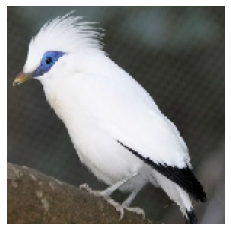

In [119]:
img = '/content/drive/MyDrive/Burungku/test2/Jalak Bali/1.jpg'
pic = load_img(img, target_size = (150, 150, 3))
plt.imshow(pic)
plt.axis('off')
output(img)

In [25]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 17.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 212 kB 75.1 MB/s 
     |████████████████████████████████| 112 kB 76.3 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 275 kB 74.4 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 2.3 MB 57.7 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 68 kB 7.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 856 kB 71.3 MB/s 
     |████████████████████████████████| 62 kB 1.0

In [120]:
from keras.models import load_model
model1 = loaded_model2
import gradio as gr
target_names = class_names
def predict_image(img):
    input=img.reshape(-1,150,150,3)
    prediction=model1.predict(input)[0]
    return {target_names[i]: float(prediction[i]) for i in range(7)}

image = gr.inputs.Image(shape=(150,150))
label = gr.outputs.Label(num_top_classes=7)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://33037.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f3a3f6189d0>,
 'http://127.0.0.1:7860/',
 'https://33037.gradio.app')

#  Visualisasi Conv Layer Melakukan Pengenalan Dengan Menggunakan GradCAM heatmap 

In [121]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [122]:
import cv2
image = cv2.imread('/content/drive/MyDrive/Burungku/train2/Maleo/002.jpg')
image = cv2.resize(image, (150, 150))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = loaded_model2.predict(image) 
i = np.argmax(preds[0])

In [123]:
for idx in range(len(loaded_model2.layers)):
  print(loaded_model2.get_layer(index = idx).name)

conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
conv2d_6
max_pooling2d_6
conv2d_7
max_pooling2d_7
flatten_1
dense_3
dense_4
dense_5


In [124]:
icam = GradCAM(loaded_model2, i, 'conv2d_7') 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (150, 150))

image = cv2.imread('/content/drive/MyDrive/Burungku/train2/Maleo/002.jpg')
image = cv2.resize(image, (150, 150))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(150, 150) (150, 150, 3)


(-0.5, 149.5, 149.5, -0.5)

<Figure size 864x360 with 0 Axes>

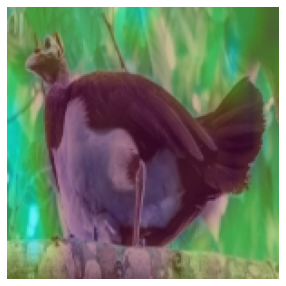

In [125]:
fig=plt.figure(figsize=(12, 5))
# fig, ax = plt.subplots(1,3)

# ax[0].imshow(heatmap)#bagaimana heatmap mencari objek 
# ax[1].imshow(image)#gambar original
# ax[2].imshow(output)#output heatmap dari model

plt.figure(figsize=(12, 5))
plt.imshow(output)
plt.axis('off')